In [3]:
import pandas as pd

In [5]:
df_target =  pd.read_excel("Sales_target_1.xlsx")

In [7]:
df_target["Month of Order Date"] = pd.to_datetime(df_target["Month of Order Date"], format="%b-%y")

In [9]:
df_target = df_target.sort_values("Month of Order Date")

In [11]:
furniture_sales_target = df_target[df_target["Category"] == "Furniture"].copy()

In [13]:
furniture_sales_target["Target Change (%)"] = furniture_sales_target["Target"].pct_change() * 100

In [17]:
furniture_sales_target

,Month of Order Date,Category,Target,Target Change (%)
9,2025-01-19,Furniture,11500,NaN
10,2025-02-19,Furniture,11600,0.869565
11,2025-03-19,Furniture,11800,1.724138
0,2025-04-18,Furniture,10400,-11.864407
1,2025-05-18,Furniture,10500,0.961538
2,2025-06-18,Furniture,10600,0.952381
3,2025-07-18,Furniture,10800,1.886792
4,2025-08-18,Furniture,10900,0.925926
5,2025-09-18,Furniture,11000,0.917431
6,2025-10-18,Furniture,11100,0.909091


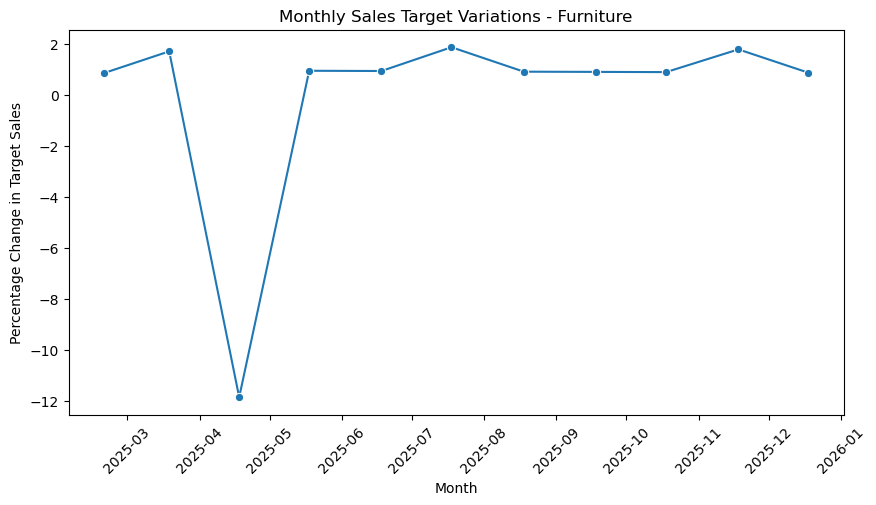

In [29]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=furniture_sales_target["Month of Order Date"], y=furniture_sales_target["Target Change (%)"], marker="o")
plt.xlabel("Month")
plt.ylabel("Percentage Change in Target Sales")
plt.title("Monthly Sales Target Variations - Furniture")
plt.xticks(rotation=45)
plt.show()

C:\Users\Rupam\AppData\Local\Temp\ipykernel_24300\1300105528.py:40: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\Rupam\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


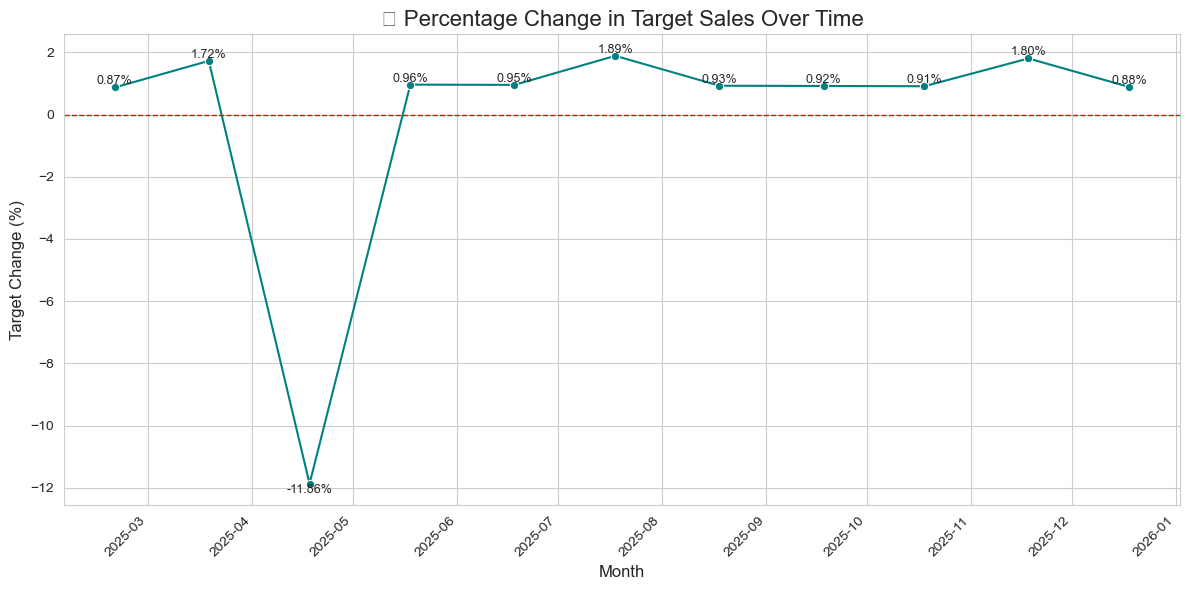

In [33]:
data = {
    'Month of Order Date': ['2025-01-19', '2025-02-19', '2025-03-19', '2025-04-18', 
                            '2025-05-18', '2025-06-18', '2025-07-18', '2025-08-18', 
                            '2025-09-18', '2025-10-18', '2025-11-18', '2025-12-18'],
    'Category': ['Furniture'] * 12,
    'Target': [11500, 11600, 11800, 10400, 10500, 10600, 10800, 10900, 11000, 11100, 11300, 11400],
    'Target Change (%)': [np.nan, 0.869565, 1.724138, -11.864407, 0.961538, 0.952381, 
                          1.886792, 0.925926, 0.917431, 0.909091, 1.801802, 0.884956]
}
df = pd.DataFrame(data)

df['Month of Order Date'] = pd.to_datetime(df['Month of Order Date'])

df_plot = df.dropna(subset=['Target Change (%)']).copy()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

line = sns.lineplot(
    x='Month of Order Date', 
    y='Target Change (%)', 
    data=df_plot, 
    marker='o',
    color='teal' 
)

plt.title('🎯 Percentage Change in Target Sales Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Target Change (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.axhline(0, color='red', linestyle='--', linewidth=1)

for x, y in zip(df_plot['Month of Order Date'], df_plot['Target Change (%)']):
    plt.text(x, y, f'{y:.2f}%', 
             ha='center', 
             va='bottom' if y >= 0 else 'top',
             fontsize=9)

plt.tight_layout()
plt.show()